# Phase 1

In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 

# models 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

from sklearn.metrics import silhouette_score


In [2]:
AliPC = True
KianaPC = False
path=""

if AliPC:
  # path = r"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset"
  path = r"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\input"
else:
  path = r"/content/drive/MyDrive/dataset"


# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        # if file.name.endswith('.jpg'):
          # adds only the image files to the images list
            images.append(file.name)

In [3]:
if KianaPC:
    from google.colab import drive
    drive.mount('/content/drive')

# print(images[:-1])

In [4]:
# # Directory containing the images
# directory = path

# # List all files in the directory
# files = os.listdir(directory)

# # Loop through each file
# for file in files:
#     # Check if the file is a regular file (not a directory)
#     if os.path.isfile(os.path.join(directory, file)):
#         # Append ".jpg" to the filename
#         new_filename = file + ".jpg"

#         # Construct the old and new file paths
#         old_filepath = os.path.join(directory, file)
#         new_filepath = os.path.join(directory, new_filename)
#         # Rename the file
#         os.rename(old_filepath, new_filepath)

# print("All images have been renamed.")

In [5]:
# Test VGG19

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input


from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 

In [6]:
# load the model first and pass as an argument
# model = VGG16()
# model = VGG19()
# model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    return features.flatten()

In [7]:
import pickle
import numpy as np

# Define the path to the dataset pickle file
if AliPC:
    pkl_Path = r"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\dataset.pkl"
else:
    pkl_Path = r"/content/drive/MyDrive/dataset.pkl"

data = {}

# loop through each image in the dataset
for image in images:
    # Check if the filename already ends with ".jpg"
    # if not image.endswith(".jpg"):
    #     # Append ".jpg" extension to the filename
    #     image_with_extension = image + ".jpg"
    # else:
    #     image_with_extension = image  # Keep the filename unchanged
    
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image, model)  # Update the filename here
        data[image] = feat  # Update the key with the new filename
        print(image)  # Print the filename with extension
    # if something fails, save the extracted features as a pickle file (optional)
    except Exception as ex:
        with open(pkl_Path, 'wb') as file:
            pickle.dump(data, file)
            print(f"Exception: {ex}")

# Save the updated dataset to the pickle file
with open(pkl_Path, 'wb') as file:
    pickle.dump(data, file)

# Get a list of the filenames 
filenames = np.array(list(data.keys()))

# Get a list of just the features
feat = np.array(list(data.values()))
# X = np.array(feat) #Use for Kiana Code (DB-Scan and Agglo ...)
feat = feat.reshape(len(images), -1)




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
subject01.centerlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
subject01.glasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject01.happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
subject01.leftlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject01.noglasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
subject01.normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
subject01.rightlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
subject01.sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
subject01.sleepy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
subject01.surprised
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
subject01.wink
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
subject02.centerlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
subject02.glasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
subject02.happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
subject02.leftlight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
subject02.noglasses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
subject02.normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
su

In [8]:
# Path to the directory where you want to save the features
if AliPC:
    output_dir = r"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\features\\"
else:
    output_dir = r"/content/drive/MyDrive/features/"

os.makedirs(output_dir, exist_ok=True)

# Extract features from images and save them
features_list = []
image_filenames = []
for image in images:
    features = extract_features(image, model)
    features_list.append(features)
    image_filenames.append(image)
    np.save(os.path.join(output_dir, f"{os.path.splitext(image)[0]}.npy"), features)

# Convert features to numpy array
X = np.array(features_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

# Phase 2

In [9]:
from sklearn.manifold import TSNE
from skimage import io
from skimage.transform import resize

In [10]:
# pca = PCA(n_components=2, random_state=22)
# pca.fit(feat)
# x = pca.transform(feat)

# print(f"Components before PCA: {feat.shape[1]}")
# print(f"Components after PCA: {pca.n_components}")

The parameter perplexity in the t-SNE algorithm is one of the key parameters that controls the amount of neighborhood of the input data that should be considered similar when constructing the low-dimensional embedding. More precisely, perplexity represents the number of nearest neighbors that each point in the original space should observe.

Using different values of perplexity can lead to different results. Generally, smaller perplexity values tend to focus the algorithm on local relationship accuracy, while larger perplexity values tend to pay more attention to global structures. Choosing an appropriate value for perplexity depends on the experience and specific characteristics of your data.

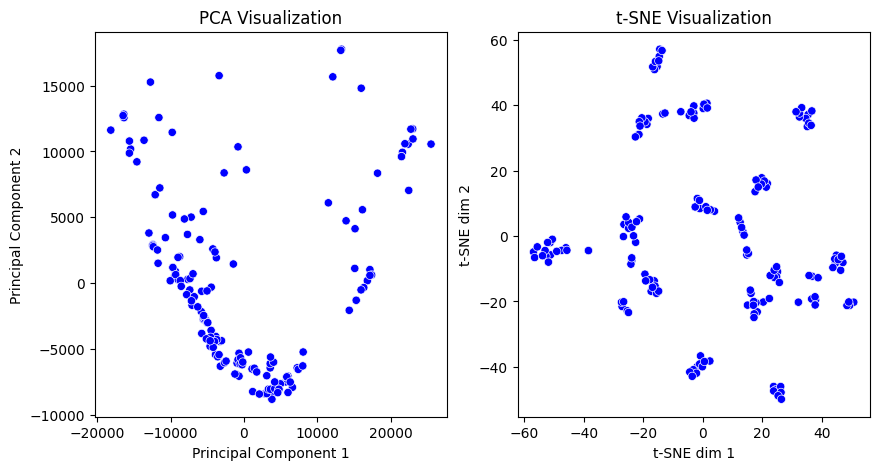

In [11]:
import os
import seaborn as sns
from skimage import io
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

# Define color map for subjects
# subject_color_map = {
#     'subject01': 'b',  # Blue
#     'subject02': 'g',  # Green
#     'subject03': 'r',  # Red
#     'subject04': 'c',  # Cyan
#     'subject05': 'm',  # Magenta
#     'subject06': 'y',  # Yellow
#     'subject07': 'k',  # Black
#     'subject08': 'tab:orange',  # Orange
#     'subject09': 'tab:brown',   # Brown
#     'subject10': 'tab:pink',    # Pink
#     'subject11': 'tab:gray',    # Gray
#     'subject12': 'tab:olive',   # Olive
#     'subject13': 'tab:cyan',    # Cyan
#     'subject14': 'tab:purple',  # Purple
#     'subject15': 'tab:blue'     # Light Blue
# }

# all of these have same color cause we dont know about number of subject and labels :)
subject_color_map = {
    'subject01': 'b',
    'subject02': 'b',
    'subject03': 'b',
    'subject04': 'b',
    'subject05': 'b',
    'subject06': 'b',
    'subject07': 'b',
    'subject08': 'b',
    'subject09': 'b',
    'subject10': 'b',
    'subject11': 'b',
    'subject12': 'b',
    'subject13': 'b',
    'subject14': 'b',
    'subject15': 'b',
}

# Load images
image_folder = path
image_files = os.listdir(image_folder)

# Preprocess images and extract features
images = []
subjects = []
for image_file in image_files:
    subject, _ = image_file.split('.', 1)  # Extract subject from filename
    subjects.append(subject)
    image_path = os.path.join(image_folder, image_file)
    image = io.imread(image_path)
    # Flatten image to create feature vector
    images.append(image.flatten())

# Convert list of images to numpy array
data = np.array(images)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42) 
tsne_result = tsne.fit_transform(data)

# Create a DataFrame for PCA result
df_pca = pd.DataFrame(pca_result, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Subject'] = subjects

# Create a DataFrame for t-SNE result
df_tsne = pd.DataFrame(tsne_result, columns=['t-SNE dim 1', 't-SNE dim 2'])
df_tsne['Subject'] = subjects

# Plot PCA result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Subject', palette=subject_color_map, legend=False) #turn True legend for show subject table guide
plt.title('PCA Visualization')

# Plot t-SNE result
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_tsne, x='t-SNE dim 1', y='t-SNE dim 2', hue='Subject', palette=subject_color_map, legend=False)
plt.title('t-SNE Visualization')

plt.show()


Due to above plot, we think t-SNE plotting is better than PCA. and the cluster number is around 17. cause we have 17 node of datas.
We can use K-Means via K = 17 and due to result, change the K.

# Phase 3

### K-Means

Images saved successfully.
Silhouette Score: 0.12849584


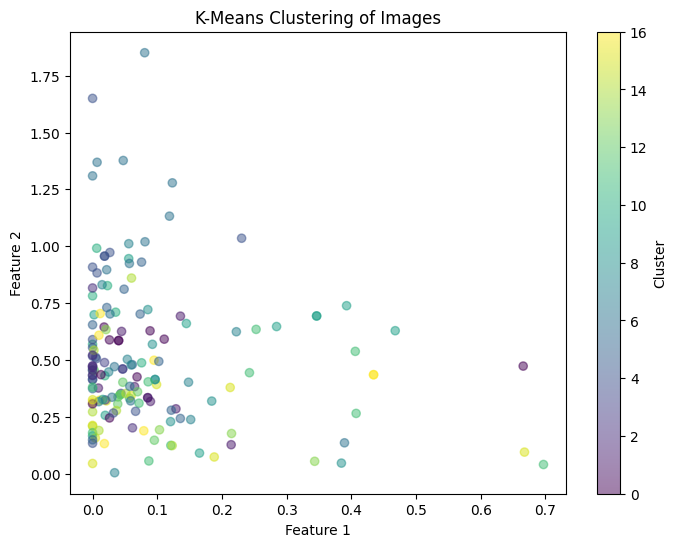

In [12]:
import shutil

clusterNum = 17

kmeans = KMeans(n_clusters=clusterNum, random_state=42)
# kmeans.fit(pca_result)
kmeans.fit(tsne_result)

kmeans.labels_

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# Create a folder to save the images
if AliPC:
    output_folder = f"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\output\\K-Means-with-K-{clusterNum}\\"
else:
    output_folder = "/content/drive/MyDrive/output/K-Means-with-K-{clusterNum}/"

os.makedirs(output_folder, exist_ok=True)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames, kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
    groups[cluster].append(file)

# Save the images
for cluster_id, images in groups.items():
    cluster_folder = os.path.join(output_folder, f"cluster_{cluster_id}")
    os.makedirs(cluster_folder, exist_ok=True)
    for image_file in images:
        shutil.copy(image_file, cluster_folder)

print("Images saved successfully.")

# Compute silhouette score
silhouette_avg = silhouette_score(feat, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(feat[:, 0], feat[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering of Images')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


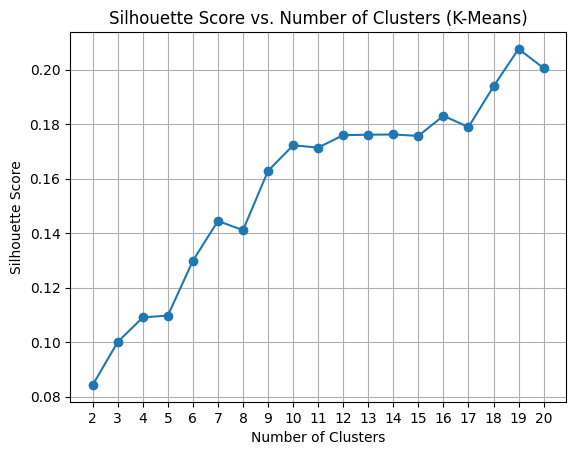

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 21):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
import matplotlib.pyplot as plt

plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (K-Means)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()

# DBSCAN

[-1 -1  0 -1  0  0 -1  0  0  0  0 -1 -1  1 -1  1  1 -1  1  1 -1  1 -1 -1
  2 -1  2  2 -1  2  2 -1  2  3  4  3 -1  3  3 -1  3  3 -1  3 -1 -1  5 -1
  5  5 -1  5  5  5  5 -1  6  6 -1  6  6 -1  6  6 -1  6  7 -1  7 -1  7  7
 -1  7  7  7  7 -1  8  4 -1  4  8 -1  4  4 -1  4 -1  9  9 -1  9  9 -1  9
  9  9  9 -1 -1 10 -1 10 10 -1 10 10 -1 10 -1 11 11 -1 11 11 -1 11 11 -1
 11 -1 12 -1 -1 12 12 -1 12 12 -1 12 13 13 13 -1 -1 13 -1 13 13 -1 13 14
 14 14 -1 14 14 -1 14 14 14 14 -1  4  4 -1  4  4 -1  4  4 -1  4]
Silhouette Score: 0.15395094


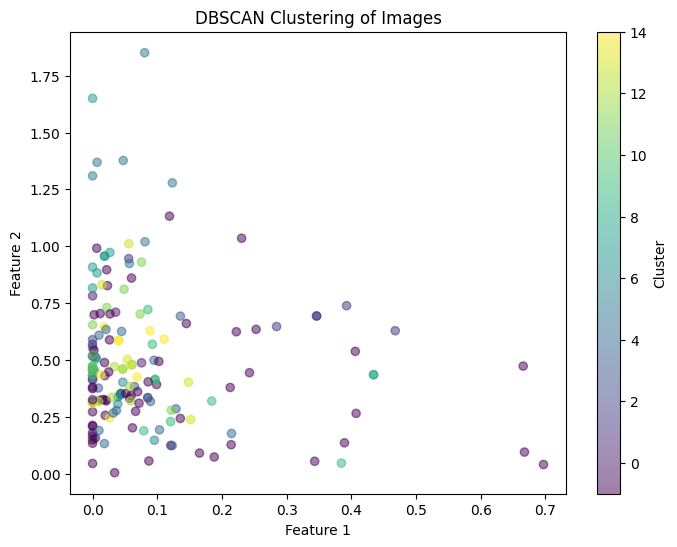

In [18]:
# Perform DBSCAN clustering

from sklearn.cluster import DBSCAN

eps = 11 # Adjust as needed
min_samples = 2 # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Create a folder to save the images
if AliPC:
    cluster_output_dir = f"E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\output\\DB-SCAN-with-eps-{eps}-min-{min_samples}\\"
else:
    cluster_output_dir = "/content/drive/MyDrive/output/DB-SCAN-with-eps-{eps}-min-{min_samples}/"

os.makedirs(cluster_output_dir, exist_ok=True)

# Move images to cluster-specific folders
for i, cluster_label in enumerate(cluster_labels):
    cluster_dir = os.path.join(cluster_output_dir, f"cluster_{cluster_label}")
    os.makedirs(cluster_dir, exist_ok=True)
    filename = os.listdir(path)[i]
    shutil.copy(os.path.join(path, filename), cluster_dir)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering of Images')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

Bug

// todo

In [20]:
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []


for eps in range(5, 21):  # Try different values of eps
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    if dbscan.labels_.size > 0:
        silhouette_avg = silhouette_score(X, dbscan.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different values of eps
import matplotlib.pyplot as plt

plt.plot(range(5, 21), silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Eps (DBSCAN)")
plt.xlabel("Eps")
plt.ylabel("Silhouette Score")
plt.xticks(range(5, 21))
plt.grid(True)
plt.show()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# Agglomarative

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# features_list = []
# for filename in os.listdir(output_dir):
#     if filename.endswith(".npy"):
#         features = np.load(os.path.join(output_dir, filename))
#         features_list.append(features)
# X = np.array(features_list)

# # Reshape X to 2D array
# num_samples = X.shape[0]
# num_features = np.prod(X.shape[1:])
# X = X.reshape(num_samples, num_features)

# n_clusters = 15  # Adjust as needed
# agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
# cluster_labels = agglomerative.fit_predict(X)

# # Create a directory to store cluster outputs
# output_dir = os.path.join(path, "cluster_output_agglomerative")
# os.makedirs(output_dir, exist_ok=True)

# # Move images to cluster-specific folders
# for cluster_label in np.unique(cluster_labels):
#     cluster_dir = os.path.join(output_dir, f"cluster_{cluster_label}")
#     os.makedirs(cluster_dir, exist_ok=True)
#     for filename, label in zip(labels_list, cluster_labels):
#         if label == cluster_label:
#             shutil.copy(os.path.join(image_dir, filename), cluster_dir)

# # Compute silhouette score
# silhouette_avg = silhouette_score(X, cluster_labels)
# print("Silhouette Score:", silhouette_avg)

# Phase 4 (Rand Index)

In [ ]:
# import os
# import numpy as np
# from itertools import combinations

# image_dir = "E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\output\\DB-SCAN-with-eps-11-min-2\\"
# predicted_labels = cluster_labels

# def load_images_and_labels(image_dir):
#     images = []
#     true_labels = []
#     for subdir in os.listdir(image_dir):
#         if subdir.startswith('cluster_'):
#             cluster_label = int(subdir.split('_')[1])
#             cluster_dir = os.path.join(image_dir, subdir)
#             for filename in os.listdir(cluster_dir):
#                 image_path = os.path.join(cluster_dir, filename)
#                 images.append(image_path)
#                 true_labels.append(cluster_label)
#     return images, true_labels

# def compute_similarity_matrix(labels):
#     n = len(labels)
#     similarity_matrix = np.zeros((n, n))
#     for i, j in combinations(range(n), 2):
#         similarity_matrix[i, j] = similarity_matrix[j, i] = 1 if labels[i] == labels[j] else 0
#     return similarity_matrix

# def compute_similarity_matrix(labels):
#     n = len(labels)
#     similarity_matrix = np.zeros((n, n))
#     for i in range(n):
#         for j in range(i + 1, n):  # Only need to compute upper triangle to avoid redundant computation
#             similarity_matrix[i, j] = similarity_matrix[j, i] = 1 if labels[i] == labels[j] else 0
#     return similarity_matrix


# def rand_index(true_labels, predicted_labels):
#     n = len(true_labels)
#     true_similarity_matrix = compute_similarity_matrix(true_labels)
#     predicted_similarity_matrix = compute_similarity_matrix(predicted_labels)
    
#     # True positive pairs
#     tp = np.sum(np.logical_and(true_similarity_matrix == 1, predicted_similarity_matrix == 1))
    
#     # True negative pairs
#     tn = np.sum(np.logical_and(true_similarity_matrix == 0, predicted_similarity_matrix == 0))
    
#     # False positive pairs
#     fp = np.sum(np.logical_and(true_similarity_matrix == 0, predicted_similarity_matrix == 1))
    
#     # False negative pairs
#     fn = np.sum(np.logical_and(true_similarity_matrix == 1, predicted_similarity_matrix == 0))
    
#     # Calculate Rand Index
#     rand_index = (tp + tn) / (tp + tn + fp + fn)
#     return rand_index

# # Path to the directory containing the images
# image_dir = image_dir

# # Load images and true cluster labels
# images, true_labels = load_images_and_labels(image_dir)

# # Replace predicted_labels with the labels obtained from your clustering algorithm
# predicted_labels = [int(filename.split('_')[1]) for filename in os.listdir(image_dir) if filename.startswith('cluster_')]

# # Compute and print the Rand Index
# ri = rand_index(true_labels, predicted_labels)
# print("Rand Index:", ri)


In [ ]:
# def compute_similarity_matrix(labels):
#     n = len(labels)
#     similarity_matrix = np.zeros((n, n))
#     for i in range(n):
#         for j in range(i + 1, n):  # Only need to compute upper triangle to avoid redundant computation
#             similarity_matrix[i, j] = similarity_matrix[j, i] = 1 if labels[i] == labels[j] else 0
#     return similarity_matrix


In [ ]:
# def rand_index(true_labels, predicted_labels):
#     n = len(true_labels)
#     true_similarity_matrix = compute_similarity_matrix(true_labels)
#     predicted_similarity_matrix = compute_similarity_matrix(predicted_labels)
    
#     # True positive pairs
#     tp = np.sum(np.logical_and(true_similarity_matrix == 1, predicted_similarity_matrix == 1)) / 2
    
#     # True negative pairs
#     tn = np.sum(np.logical_and(true_similarity_matrix == 0, predicted_similarity_matrix == 0)) / 2
    
#     # False positive pairs
#     fp = np.sum(np.logical_and(true_similarity_matrix == 0, predicted_similarity_matrix == 1)) / 2
    
#     # False negative pairs
#     fn = np.sum(np.logical_and(true_similarity_matrix == 1, predicted_similarity_matrix == 0)) / 2
    
#     # Calculate Rand Index
#     rand_index = (tp + tn) / (tp + tn + fp + fn)
#     return rand_index


In [ ]:
# import os
# import numpy as np
# from itertools import combinations

# image_dir = "E:\\University\\Term 8\\Computational Intelligence\\Project\\1\\Main-Project\\ML\\dataset\\output\\DB-SCAN-with-eps-11-min-2\\"
# predicted_labels = cluster_labels

# # Path to the directory containing the images
# image_dir = image_dir

# # Load images and true cluster labels
# images, true_labels = load_images_and_labels(image_dir)

# # Replace predicted_labels with the labels obtained from your clustering algorithm
# predicted_labels = [int(filename.split('_')[1]) for filename in os.listdir(image_dir) if filename.startswith('cluster_')]

# # print(true_labels)
# # print(len(true_labels))
# # print(predicted_labels)
# # Compute and print the Rand Index
# ri = rand_index(true_labels, predicted_labels)
# print("Rand Index:", ri)